In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform, io
from scipy import signal
from IPython.display import display

In [3]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

In [4]:
mask = np.ones((3, 3))
mask = mask * (1 / mask.size)
display(mask)
orig_img = data.camera()
conv_img = np.zeros(shape= orig_img.shape)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [5]:
mask_shape = mask.shape
orig_img_shape = orig_img.shape

In [6]:
for i  in range(0,orig_img_shape[0] - mask_shape[0]+1):
    for j in range(0, orig_img_shape[1] - mask_shape[1]+1):
        mask_img_mult = orig_img[i:i + mask_shape[0], j:j + mask_shape[1]] * mask
        conv_img[i + 1 , j + 1] = np.sum(mask_img_mult)

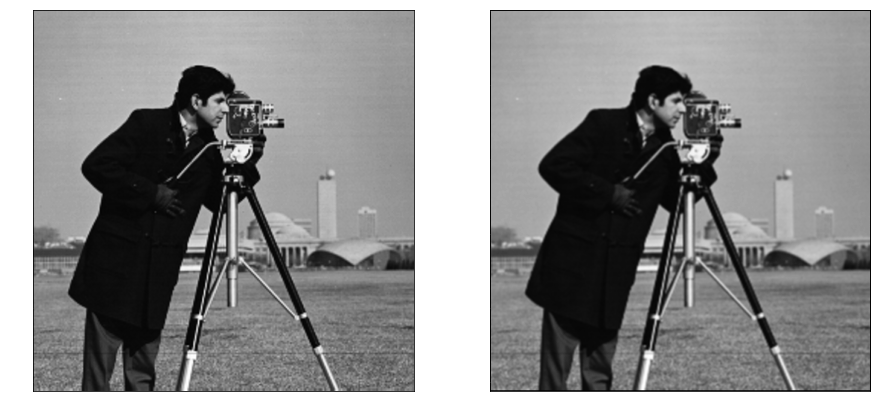

In [7]:
plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(orig_img, cmap= 'gray')
plt.subplot(122)
plt.imshow(conv_img.astype(dtype= np.uint8),cmap= 'gray')

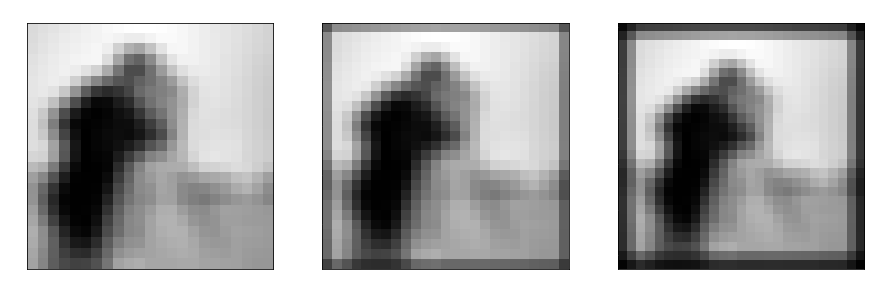

In [8]:
kernel = mask
orig_img2 = transform.resize(orig_img, np.floor(np.array(orig_img_shape) / 20).astype(np.uint8))
full_conv = signal.convolve2d(orig_img2, kernel, mode= 'full')
valid_conv = signal.convolve2d(orig_img2, kernel, mode= 'valid')
same_conv = signal.convolve2d(orig_img2, kernel, mode= 'same')
plt.figure(figsize= (15, 10))
plt.set_cmap('gray')
plt.subplot(131)
plt.title('Valid convolution')
plt.imshow(valid_conv)
plt.subplot(132)
plt.title('Same convolution')
plt.imshow(same_conv)
plt.subplot(133)
plt.title('Full convolution')
plt.imshow(full_conv)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

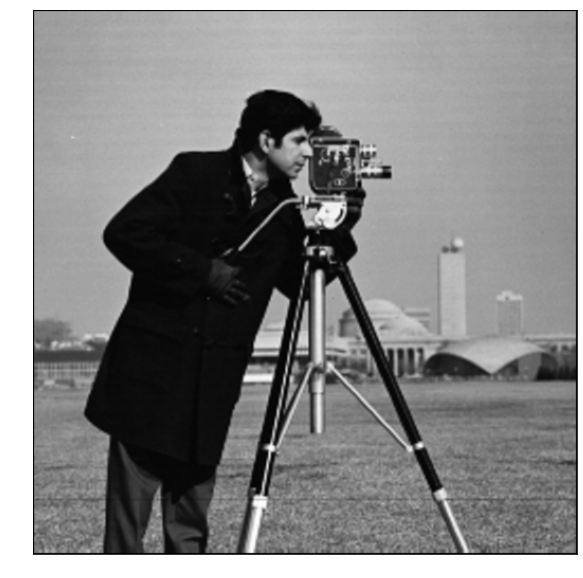

In [9]:
kernel = np.outer(signal.gaussian(3, 0.5), signal.gaussian(3, 0.5))
kernel = kernel / np.sum(kernel)
display(kernel)
plt.figure(figsize= (15, 10))
plt.imshow(signal.convolve2d(orig_img, kernel))

Text(0.5, 1.0, 'Sobel 2')

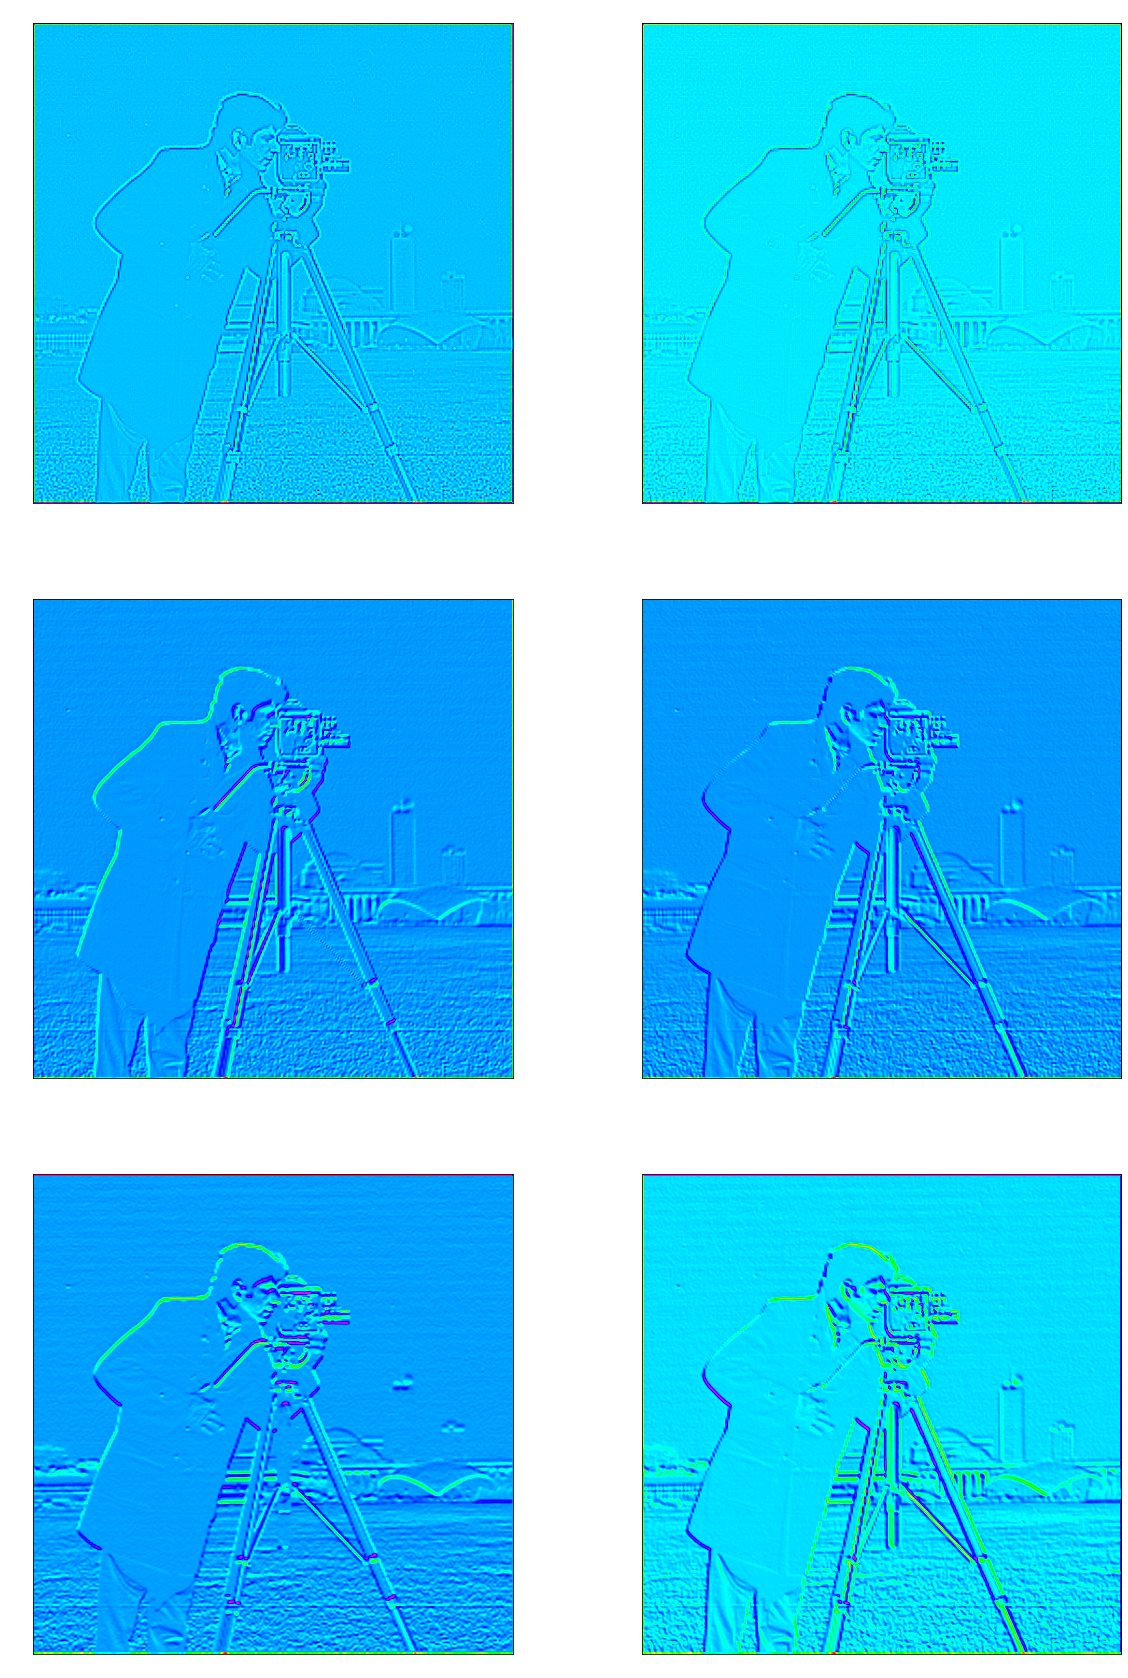

In [10]:
laplace_1_mask = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])

laplace_2_mask = np.ones((3,3))
laplace_2_mask[1,1] = -8

roberts_1_mask = np.array([[1, 0],
                           [0, -1]])
roberts_2_mask = np.array([[0, 1],
                           [-1, 0]])

sobel_1_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_2_mask = np.array([[0, 1, 2], [-1, 0, 1], [-1, -2, 0]])
plt.figure(figsize=(20, 30))
plt.subplot(321)
plt.imshow(signal.convolve2d(orig_img,laplace_1_mask),cmap='hsv')
plt.title("Laplace 1")
plt.subplot(322)
plt.imshow(signal.convolve2d(orig_img,laplace_2_mask),cmap='hsv')
plt.title("Laplace 2")
plt.subplot(323)
plt.imshow(signal.convolve2d(orig_img,roberts_1_mask),cmap='hsv')
plt.title("Roberts 1")
plt.subplot(324)
plt.imshow(signal.convolve2d(orig_img,roberts_2_mask),cmap='hsv')
plt.title("Robert 2")
plt.subplot(325)
plt.imshow(signal.convolve2d(orig_img,sobel_1_mask),cmap='hsv')
plt.title("Sobel 1")
plt.subplot(326)
plt.imshow(signal.convolve2d(orig_img,sobel_2_mask),cmap='hsv')
plt.title("Sobel 2")


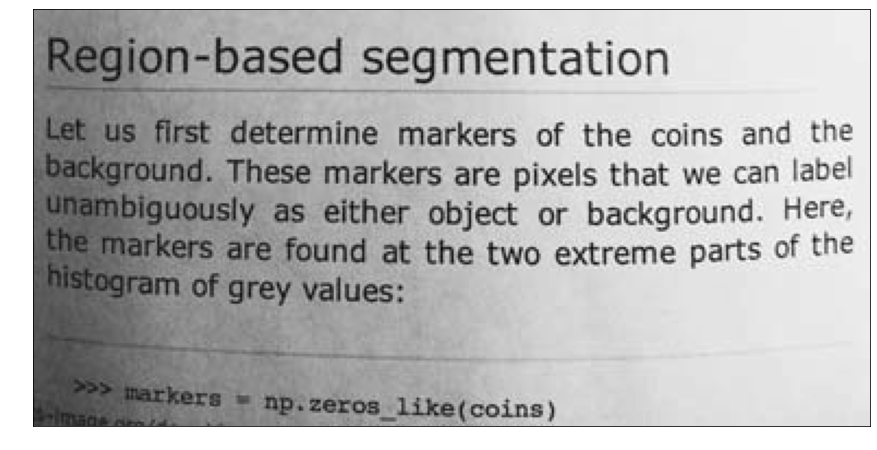

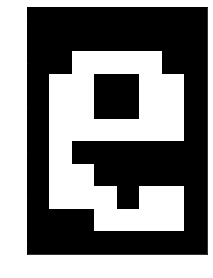

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(data.page())

img_with_text = exposure.equalize_adapthist(data.page()) < 0.35
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.imshow(img_with_text)
kernel  = transform.rotate(img_with_text[104:115, 63:71],180)
plt.subplot(222)
plt.imshow(transform.rotate(kernel,180))

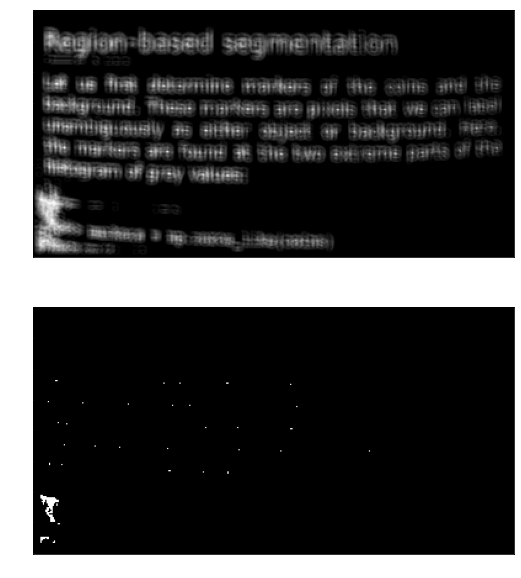

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(211)
out  = signal.convolve2d(img_with_text.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(212)
plt.imshow(out>0.8*np.max(out))

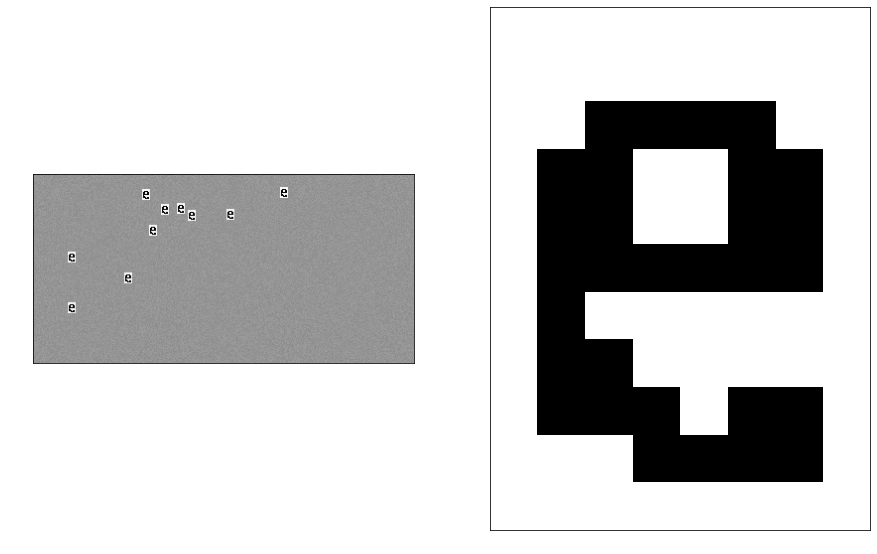

In [13]:
plt.figure(figsize= (15, 10))
plt.subplot(121)
kernel = 255 - transform.rotate(img_with_text[104:115, 63:71], 180) * 255
textImg = np.ones(shape= img_with_text.shape) * 150
randPositions = np.random.rand(10, 2)
randPositions[:, 0] = randPositions[:, 0] * (textImg.shape[0] - kernel.shape[0])
randPositions[:, 1] = randPositions[:, 1] * (textImg.shape[1] - kernel.shape[1])
randPositions = np.floor(randPositions).astype(np.uint8)

for randPos in randPositions:
    textImg[randPos[0]:randPos[0] + kernel.shape[0], randPos[1]:randPos[1] + kernel.shape[1]] = transform.rotate(kernel, 180)

textImg = textImg + np.random.rand(textImg.shape[0], textImg.shape[1]) * 20
plt.imshow(textImg)
plt.subplot(122)
plt.imshow(transform.rotate(kernel, 180))

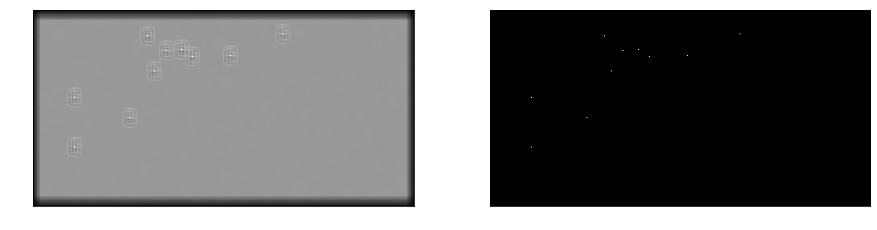

In [14]:
plt.figure(figsize= (15, 10))
plt.subplot(121)
out = signal.convolve2d(textImg.astype(np.float), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out > 0.9 * np.max(out))

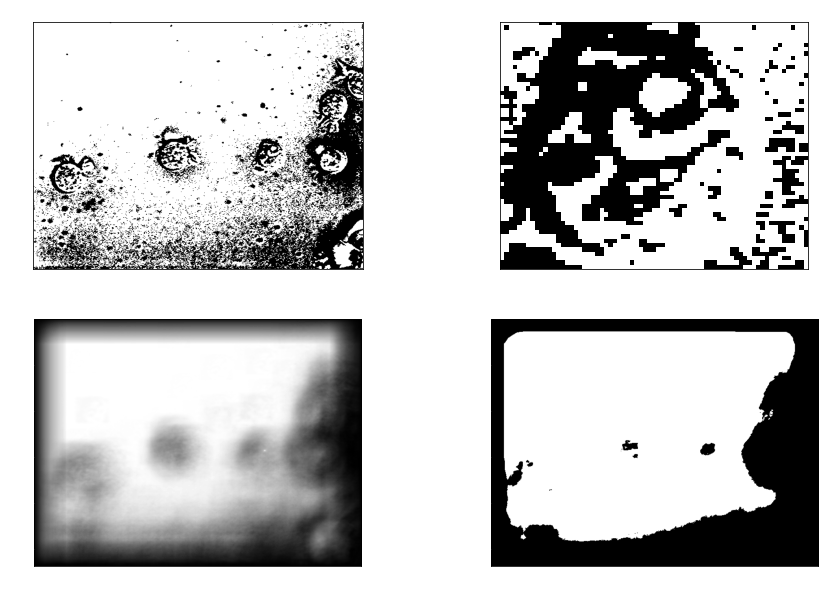

In [28]:
img = io.imread('./imgs/AT3_1m4_01.tif')
plt.figure(figsize= (15, 10))
plt.imshow(img)
modify = exposure.equalize_adapthist(img) < 0.35
plt.subplot(221)
plt.imshow(modify)

plt.subplot(222)
mask = transform.rotate(modify[230:287, 429:500], 180)
plt.imshow(transform.rotate(mask, 180))
plt.title('230:287,429:500')

plt.subplot(223)
out = signal.convolve2d(modify.astype(np.float), mask)
plt.imshow(out)
plt.subplot(224)
plt.imshow(out > 0.55 * np.max(out))